### Importing libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
wine_data = pd.read_csv('winequality-red.csv')

### Data Preprocessing

In [3]:
# Check for missing values
wine_data.isnull().sum()

# Split the data into features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model Selection

In [5]:
# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [6]:
# Predict wine quality on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 0.3006603124999999
R-squared (R2) Score: 0.5399271357910311


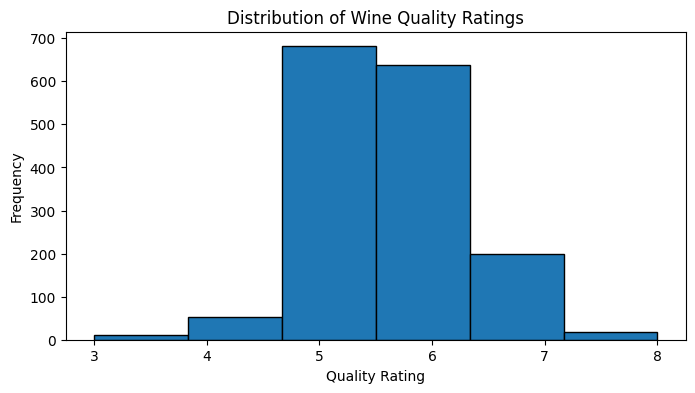

In [9]:
# Visualize the distribution of wine quality ratings
plt.figure(figsize=(8, 4))
plt.hist(wine_data['quality'], bins=6, edgecolor='black')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
plt.show()


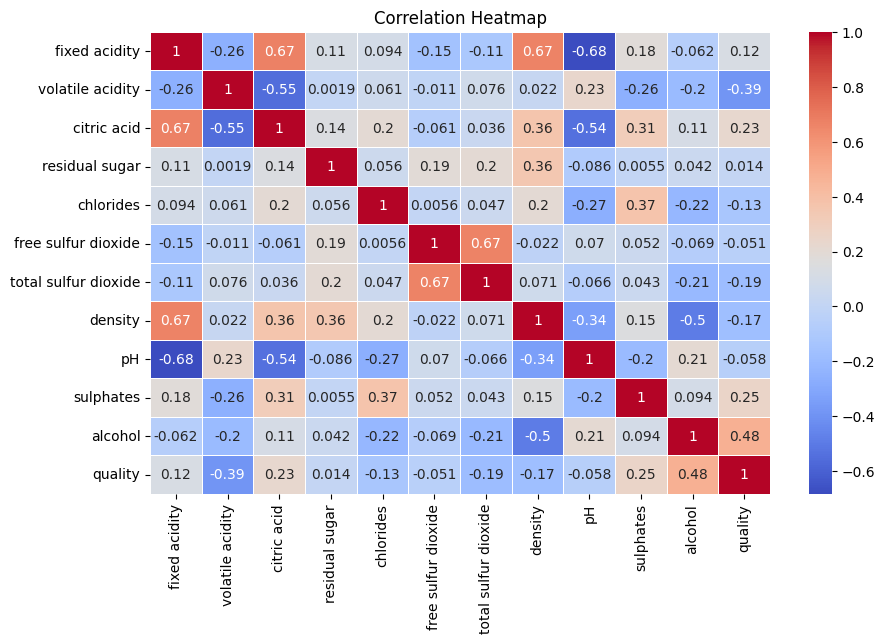

In [11]:
# Calculate the correlation matrix
correlation_matrix = wine_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


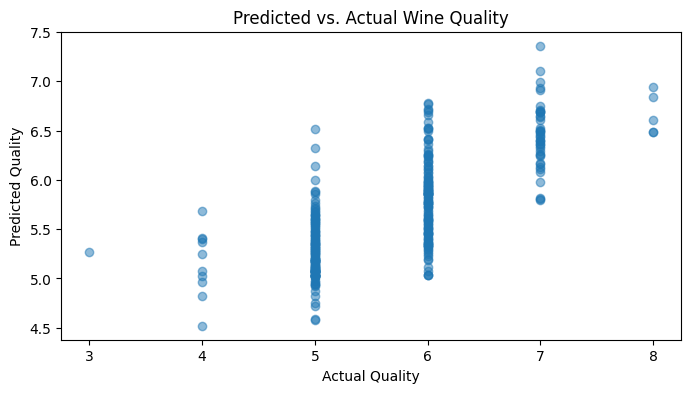

In [12]:
# Create a scatter plot for predicted vs. actual wine quality
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs. Actual Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()
